In [1]:
# Machine Learning Code

In [2]:
# In order to start we need to Load in some 

In [2]:
# Intro ML Group Project
from packaging import version
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import the imputer

In [9]:
# Now, we can load the data set so that we can explore all the features.

In [3]:
# We want to split the data set before we begin. A random sampling will suffice. 

total_set = pd.read_csv("train.csv", nrows = 50000)

In [4]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
# Now we spliting the training and test data set

from sklearn.model_selection import train_test_split

taxi_train, taxi_test = train_test_split(total_set, test_size = .2, random_state = 42)


In [6]:
# Now we have to explore the data set

In [7]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
39087,2013-07-27 17:04:00.00000048,10.0,2013-07-27 17:04:00 UTC,-73.974332,40.791427,-73.979032,40.766365,5
30893,2013-01-08 09:26:00.00000068,4.0,2013-01-08 09:26:00 UTC,-73.973657,40.751632,-73.969945,40.756702,5
45278,2012-03-17 16:45:00.00000050,6.9,2012-03-17 16:45:00 UTC,-73.975263,40.752280,-73.995098,40.737500,4
16398,2012-06-08 09:01:17.0000004,7.7,2012-06-08 09:01:17 UTC,-73.983034,40.766784,-73.971944,40.789289,1
13653,2015-06-22 17:30:49.0000007,4.5,2015-06-22 17:30:49 UTC,-73.986717,40.771648,-73.982140,40.770699,1


In [8]:
# A better way to get an idea of what is happening in the data set

taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                40000 non-null  object 
 1   fare_amount        40000 non-null  float64
 2   pickup_datetime    40000 non-null  object 
 3   pickup_longitude   40000 non-null  float64
 4   pickup_latitude    40000 non-null  float64
 5   dropoff_longitude  40000 non-null  float64
 6   dropoff_latitude   40000 non-null  float64
 7   passenger_count    40000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.7+ MB


Text(0.5, 1.0, 'Instances per Fare Amount, in Dollars')

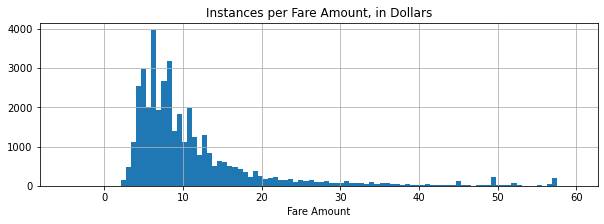

In [9]:
# From the above command we see that we have two object type attributes,
# one integer attribute, and five float type attributes.

# We can have a better understanding of the scales of the different attributes
# By visualizing them

taxi_train[taxi_train.fare_amount <60].fare_amount.hist(bins = 100,
                                                         figsize = (10,3))

plt.xlabel("Fare Amount")
plt.title("Instances per Fare Amount, in Dollars")

In [10]:
# From afar it seems like most of the fare amounts are between 
# 0 and 20 Dollars, this is something that we can take into consideration when scaling 

Text(0.5, 1.0, 'Instances per Passenger Number')

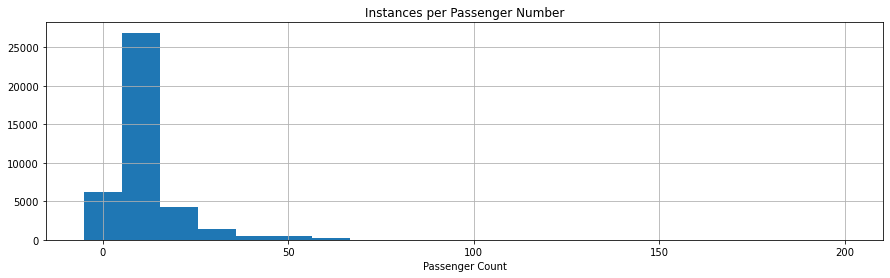

In [11]:
# Lets also take a look at the passenger count

taxi_train[taxi_train.passenger_count <20].fare_amount.hist(bins = 20,
                                                         figsize = (15,4))

plt.xlabel("Passenger Count")
plt.title("Instances per Passenger Number")

In [12]:
# Impute missing values with the mean for Taxi Fare column

taxidf = taxi_train

imputer = SimpleImputer(strategy="mean")

taxi_num = taxidf.select_dtypes(include = [np.number])

imputer.fit(taxi_num)

imputer.transform(taxi_num)

array([[ 10.      , -73.974332,  40.791427, -73.979032,  40.766365,
          5.      ],
       [  4.      , -73.973657,  40.751632, -73.969945,  40.756702,
          5.      ],
       [  6.9     , -73.975263,  40.75228 , -73.995098,  40.7375  ,
          4.      ],
       ...,
       [ 12.1     , -73.974665,  40.751742, -73.995985,  40.744347,
          2.      ],
       [ 12.1     , -73.987243,  40.72241 , -73.97162 ,  40.76199 ,
          1.      ],
       [ 57.33    , -73.778682,  40.646662, -73.99368 ,  40.752352,
          1.      ]])

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

taxi_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("standardizer", StandardScaler())
])

# We can apply the same transformation as above using
# a pipeline to make things more efficient

# Note: Have to keep things even between training and test and training

taxitestdf = taxi_test

taxi_num_test = taxitestdf.select_dtypes(include = [np.number])

imputer.fit(taxi_num_test)

imputer.transform(taxi_num_test)

taxi_num_test

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
33553,7.3,-73.980883,40.759608,-73.957732,40.782482,1
9427,33.3,-73.972360,40.762984,-73.866963,40.767363,2
199,5.5,-73.989692,40.735497,-73.982012,40.739392,1
12447,7.0,-73.973510,40.748522,-73.988325,40.750062,2
39489,5.3,-73.972496,40.759434,-73.980302,40.745949,1
...,...,...,...,...,...,...
28567,9.3,-74.005882,40.748470,-74.003888,40.719365,1
25079,5.5,-73.969475,40.766174,-73.959496,40.782127,6
18707,6.5,-73.954760,40.777885,-73.971187,40.758290,1
15200,30.5,-73.990815,40.736393,-73.812455,40.725135,1


In [14]:
# Display the first few rows of the DataFrame after imputation
print("Imputed Taxi Train Data:")
print(taxi_num.head())

Imputed Taxi Train Data:
       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
39087         10.0        -73.974332        40.791427         -73.979032   
30893          4.0        -73.973657        40.751632         -73.969945   
45278          6.9        -73.975263        40.752280         -73.995098   
16398          7.7        -73.983034        40.766784         -73.971944   
13653          4.5        -73.986717        40.771648         -73.982140   

       dropoff_latitude  passenger_count  
39087         40.766365                5  
30893         40.756702                5  
45278         40.737500                4  
16398         40.789289                1  
13653         40.770699                1  


In [15]:
# To get a better look

taxi_num

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
39087,10.00,-73.974332,40.791427,-73.979032,40.766365,5
30893,4.00,-73.973657,40.751632,-73.969945,40.756702,5
45278,6.90,-73.975263,40.752280,-73.995098,40.737500,4
16398,7.70,-73.983034,40.766784,-73.971944,40.789289,1
13653,4.50,-73.986717,40.771648,-73.982140,40.770699,1
...,...,...,...,...,...,...
11284,6.50,-73.980910,40.767860,-73.980212,40.780342,1
44732,3.70,-73.960564,40.775861,-73.961830,40.771255,1
38158,12.10,-73.974665,40.751742,-73.995985,40.744347,2
860,12.10,-73.987243,40.722410,-73.971620,40.761990,1


In [16]:
# Display the info of the imputed DataFrame
print("Imputed Taxi Train Info:")
print(taxi_num.info())

Imputed Taxi Train Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        40000 non-null  float64
 1   pickup_longitude   40000 non-null  float64
 2   pickup_latitude    40000 non-null  float64
 3   dropoff_longitude  40000 non-null  float64
 4   dropoff_latitude   40000 non-null  float64
 5   passenger_count    40000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.1 MB
None


In [17]:
# Now that we know that there are no null numbers we can move on to organizing the other columns

In [18]:
# We need to be able to know the distance traveled but we are only given
# longitude and latitude lines. 

# Since we need to calculate distance on a sphere we can use the Haversine Formula
# Failed Version of HAversine Function

import math

def haversine(lat1, lon1, lat2, lon2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    #lon1, lat1 = coord1
    #lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)

    return km


In [19]:
# Apply to DF
import math

def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance



distance = hav_dist(taxi_num['pickup_latitude'], 
                                 taxi_num['pickup_longitude'], 
                                 taxi_num['dropoff_latitude'], 
                                 taxi_num['dropoff_longitude'])

distance

39087     2.814726
30893     0.644659
45278     2.343742
16398     2.670991
13653     0.399693
           ...    
11284     1.389179
44732     0.523141
38158     1.975284
860       4.593692
15795    21.601278
Length: 40000, dtype: float64

In [26]:
# Now we should used the function that we created before to create a
# Column that describes the total distance traveled

taxi_train2 = pd.concat([taxi_num, distance], axis = 1)

taxi_train2.rename(columns = {0:"distance"}, inplace = True)

taxi_train2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
39087,10.00,-73.974332,40.791427,-73.979032,40.766365,5,2.814726
30893,4.00,-73.973657,40.751632,-73.969945,40.756702,5,0.644659
45278,6.90,-73.975263,40.752280,-73.995098,40.737500,4,2.343742
16398,7.70,-73.983034,40.766784,-73.971944,40.789289,1,2.670991
13653,4.50,-73.986717,40.771648,-73.982140,40.770699,1,0.399693
...,...,...,...,...,...,...,...
11284,6.50,-73.980910,40.767860,-73.980212,40.780342,1,1.389179
44732,3.70,-73.960564,40.775861,-73.961830,40.771255,1,0.523141
38158,12.10,-73.974665,40.751742,-73.995985,40.744347,2,1.975284
860,12.10,-73.987243,40.722410,-73.971620,40.761990,1,4.593692


In [21]:
# We also would like to know more information about the time that these trips take place
# Currently, they are in a format that is not all that useful to us

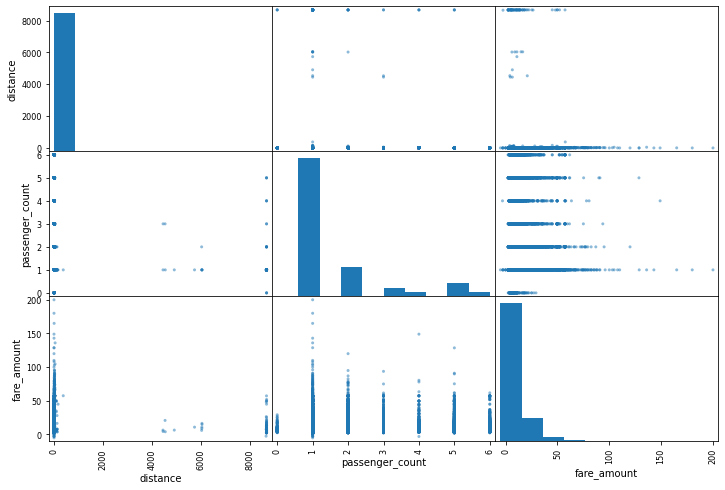

In [27]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["distance", "passenger_count",
              "fare_amount"]
scatter_matrix(taxi_train2[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# Based on the look of the scatter matrix it seems like there is some scaling that needs to be done

In [30]:
taxi_num_test

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
33553,7.3,-73.980883,40.759608,-73.957732,40.782482,1
9427,33.3,-73.972360,40.762984,-73.866963,40.767363,2
199,5.5,-73.989692,40.735497,-73.982012,40.739392,1
12447,7.0,-73.973510,40.748522,-73.988325,40.750062,2
39489,5.3,-73.972496,40.759434,-73.980302,40.745949,1
...,...,...,...,...,...,...
28567,9.3,-74.005882,40.748470,-74.003888,40.719365,1
25079,5.5,-73.969475,40.766174,-73.959496,40.782127,6
18707,6.5,-73.954760,40.777885,-73.971187,40.758290,1
15200,30.5,-73.990815,40.736393,-73.812455,40.725135,1


In [35]:
# Applying the same transformations to the test set

distance_test = hav_dist(taxi_num_test['pickup_latitude'], 
                                 taxi_num_test['pickup_longitude'], 
                                 taxi_num_test['dropoff_latitude'], 
                                 taxi_num_test['dropoff_longitude'])

#distance_test

taxi_test2 = pd.concat([taxi_test, distance_test], axis = 1)



taxi_test2.rename(columns = {0:"distance"}, inplace = True)

taxi_test2

#taxi_num_test

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33553,2011-09-22 06:08:00.00000040,7.3,2011-09-22 06:08:00 UTC,-73.980883,40.759608,-73.957732,40.782482,1,3.204691
9427,2011-03-23 22:03:14.0000005,33.3,2011-03-23 22:03:14 UTC,-73.972360,40.762984,-73.866963,40.767363,2,8.889686
199,2013-01-05 21:36:00.000000198,5.5,2013-01-05 21:36:00 UTC,-73.989692,40.735497,-73.982012,40.739392,1,0.778635
12447,2012-12-10 12:51:00.00000039,7.0,2012-12-10 12:51:00 UTC,-73.973510,40.748522,-73.988325,40.750062,2,1.259684
39489,2009-04-27 21:08:06.0000004,5.3,2009-04-27 21:08:06 UTC,-73.972496,40.759434,-73.980302,40.745949,1,1.637296
...,...,...,...,...,...,...,...,...,...
28567,2010-07-05 16:23:00.00000023,9.3,2010-07-05 16:23:00 UTC,-74.005882,40.748470,-74.003888,40.719365,1,3.240686
25079,2015-05-29 16:31:55.0000003,5.5,2015-05-29 16:31:55 UTC,-73.969475,40.766174,-73.959496,40.782127,6,1.962870
18707,2012-04-09 07:17:02.0000002,6.5,2012-04-09 07:17:02 UTC,-73.954760,40.777885,-73.971187,40.758290,1,2.580934
15200,2010-08-15 05:56:25.0000001,30.5,2010-08-15 05:56:25 UTC,-73.990815,40.736393,-73.812455,40.725135,1,15.080968


In [36]:
# Linear Regressor

lr = LinearRegression()

X_train= taxi_train2[["distance"]].values
y_train= taxi_train2[["fare_amount"]].values
X_test= taxi_test2[["distance"]].values
y_test= taxi_test2[["fare_amount"]].values

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 9.642


In [37]:
# RandomForest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 5.262


In [9]:
# Results appear to be skewed due to the differences in scaling between features

# Dealing with Datetime

taxi_train['pickup_datetime'] = pd.to_datetime(taxi_train.pickup_datetime)
taxi_test['pickup_datetime'] = pd.to_datetime(taxi_test.pickup_datetime)


## We want to be able to work with daytime feature in a way that is useful

In [10]:
# Since there is a lot to be known from the time of pickup we need to separate information

# Incomplete

taxi_train.loc[:, 'pickup_hour'] = taxi_train['pickup_datetime'].taxi_train.hour
taxi_train.loc[:, 'pickup_weekday'] = taxi_train['pickup_datetime'].taxi_train.day_name()
taxi_train.loc[:, 'pickup_date'] = taxi_train['pickup_datetime'].dtaxi_train.day
taxi_train.loc[:, 'pickup_month'] = taxi_train['pickup_datetime'].taxi_train.month
taxi_train.loc[:, 'pickup_day'] = taxi_train['pickup_datetime'].taxi_train.dayofweek
taxi_test.loc[:, 'pickup_hour'] = taxi_test['pickup_datetime'].taxi_train.hour
taxi_test.loc[:, 'pickup_weekday'] = taxi_test['pickup_datetime'].taxi_train.day_name()
taxi_test.loc[:, 'pickup_date'] = taxi_test['pickup_datetime'].taxi_train.day
taxi_test.loc[:, 'pickup_month'] = taxi_test['pickup_datetime'].taxi_train.month
taxi_test.loc[:, 'pickup_day'] = taxi_test['pickup_datetime'].taxi_train.dayofweek

AttributeError: 'Series' object has no attribute 'taxi_train'

In [ ]:
# Resources Used Along the Way Include:


# Calculating distance using the Haversine Formula: https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128#:~:text=All%20of%20these%20can%20be,longitude%20of%20the%20two%20points.

# Done: